https://github.com/funkacer/Pyth/blob/master/AQUA/%23PL_AQUA_II/9e_PZ_grafy7.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from ipywidgets import interactive, IntSlider, Checkbox, fixed, Output, HTML
from IPython.display import display
from collections import defaultdict
import datetime

from _Grafy1 import getBarChartH, getBarChartV

/var/folders/fb/xl0hnskx527bfqkv38l3sn7h0000gn/T/ipykernel_17603/1617781658.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
PZ_df = pd.DataFrame([[1, 'O', 'O'], [2, 'O', 'X'], [3, 'X', 'O']], columns = ['Suma', 'FILTR01_A', 'FILTR02_B'])
PZ_df['FILTR00_ALL'] = 'O'
PZ_df['FILTR99_FINAL'] = 'O'

In [3]:
PZ_df

,Suma,FILTR01_A,FILTR02_B,FILTR00_ALL,FILTR99_FINAL
0,1,O,O,O,O
1,2,O,X,O,O
2,3,X,O,O,O


In [4]:
filter_cols = sorted([col for col in PZ_df.columns if 'FILTR' in col])

In [5]:
filter_cols

['FILTR00_ALL', 'FILTR01_A', 'FILTR02_B', 'FILTR99_FINAL']

In [6]:
col = filter_cols[0]
PZ_df_agg = PZ_df.groupby([col])[[col]].count().transpose()
for col in filter_cols[1:]:
    PZ_df_agg = pd.concat([PZ_df_agg, PZ_df.groupby([col])[[col]].count().transpose()])

In [7]:
PZ_df_agg

,O,X
FILTR00_ALL,3,NaN
FILTR01_A,2,1.0
FILTR02_B,2,1.0
FILTR99_FINAL,3,NaN


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

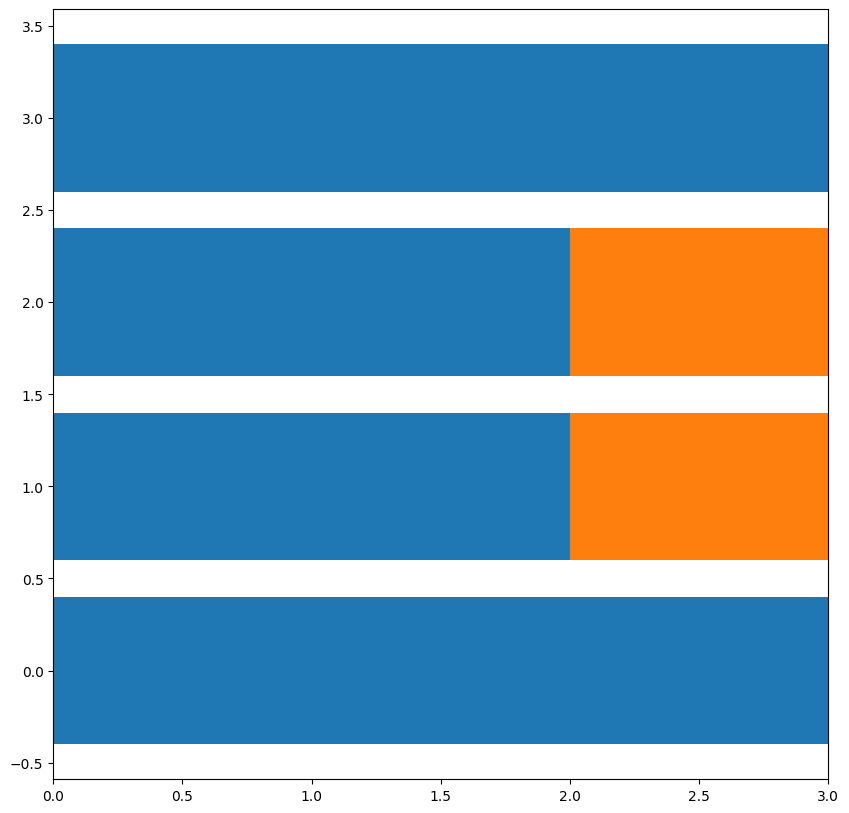

In [8]:
getBarChartH(PZ_df_agg, ['O','X'], sort_values = False, sort_ascending = False, rotation = 0)

In [14]:
def recount():
    global PZ1_df_agg, PZ1_df
    filter_cols1 = []
    filter_cols1.append(filter_cols[0])
    for col in filter_cols[1:]:
        for l in lst.keys():
            if col == l and lst[l]: filter_cols1.append(l)
    filter_cols1.append(filter_cols[-1])
    #print(filter_cols1)
    col = filter_cols1[0]
    PZ1_df_agg = PZ_df.groupby([col])[[col]].count().transpose()
    PZ1_df = PZ_df[PZ_df[col] == 'O']
    for col in filter_cols1[1:]:
        PZ1_df_agg = pd.concat([PZ1_df_agg, PZ1_df.groupby([col])[[col]].count().transpose()])
        PZ1_df = PZ1_df[PZ1_df[col] == 'O']
    print(filter_cols1)

In [15]:
def changed(b):
    global lst
    lst = defaultdict(bool)
    for ai in a:
        lst[ai.description] = ai.value
        #print(ai.value)
    xi = ''
    yi = ''
    for bi in b:
        #print(b)
        if bi == 'new' and isinstance(b[bi],dict):
            if 'value' in b[bi].keys():
                #print(bi, ':', b[bi], ':', b[bi]['value'])
                yi = b[bi]['value']
        if bi == 'owner' and isinstance(b[bi],Checkbox):
            #print(b[bi].description)
            xi = b[bi].description
    #neco se zmenilo
    if isinstance(yi, bool):
        lst[xi] = yi
        #print(xi, yi)
        #print(lst)
        recount()
    

a = []
for i in range(1, len(filter_cols)-1):
    if i in (17,19,20):
        ai = Checkbox(False, description=filter_cols[i])
    else:
        ai = Checkbox(True, description=filter_cols[i])
    ai.observe(changed)
    a.append(ai)

lst = defaultdict(bool)
for ai in a:
    lst[ai.description] = ai.value
recount()

['FILTR00_ALL', 'FILTR01_A', 'FILTR02_B', 'FILTR99_FINAL']


In [16]:
output = Output()
        
for ai in a:
    display(ai)

Checkbox(value=True, description='FILTR01_A')

Checkbox(value=True, description='FILTR02_B')

In [17]:
a

[Checkbox(value=True, description='FILTR01_A'),
 Checkbox(value=True, description='FILTR02_B')]

In [18]:
output

Output()

In [22]:
PZ1_df

,Suma,FILTR01_A,FILTR02_B,FILTR00_ALL,FILTR99_FINAL
0,1,O,O,O,O
1,2,O,X,O,O
